In [1]:
import healpy as hp

In [2]:
nside = 64

In [3]:
hp.nside2resol(64, arcmin=True)

54.967782589078496

In [4]:
import numpy as np

npix = hp.nside2npix(nside)

m = np.zeros(npix)

In [5]:
m[hp.ang2pix(nside, np.pi/2, 0)] = 100

In [6]:
m_smoothed = hp.smoothing(m, fwhm=np.radians(5))

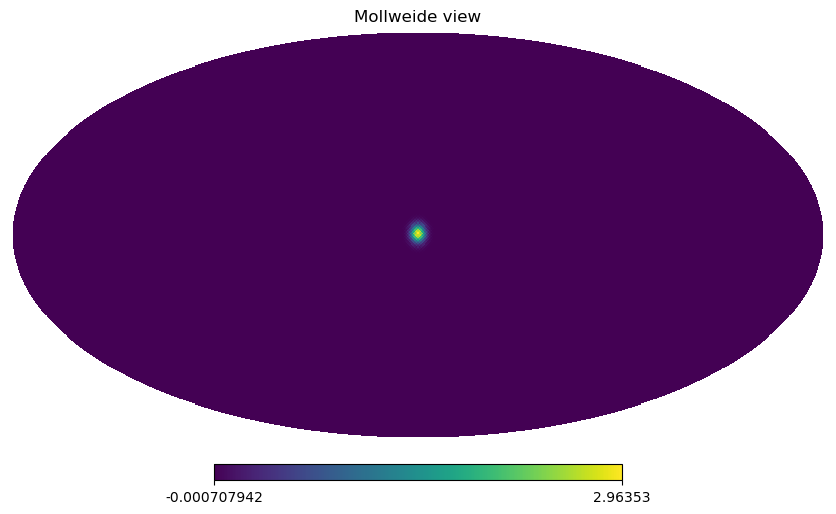

In [7]:
hp.mollview(m_smoothed)

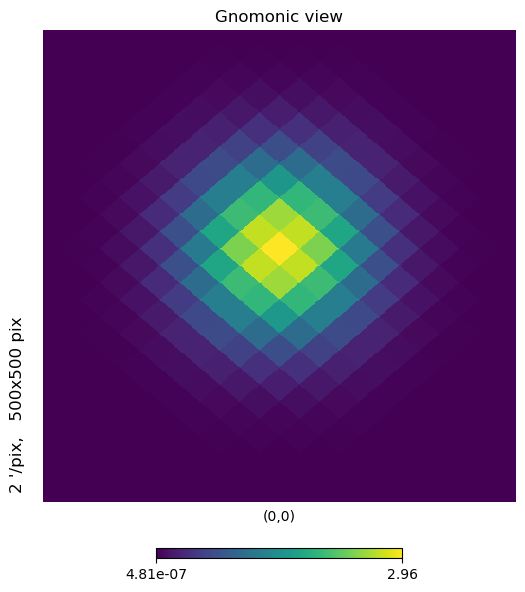

In [8]:
hp.gnomview(m_smoothed, reso=2, xsize=500)

In [9]:

nside = 64
shape = (3, hp.nside2npix(nside))

In [10]:
from pathlib import Path

In [11]:
from pysm3 import InterpolatingComponent
from pysm3 import units as u

In [12]:
tmp_path = Path("tmp")

In [34]:
m = np.ones(shape, dtype=np.float32) * 10
m[0, hp.ang2pix(nside, np.pi / 2, 0)] = 100
m_smoothed = hp.smoothing(m, fwhm=np.radians(3))
hp.write_map(tmp_path / "10.fits", m_smoothed, overwrite=True)

c = InterpolatingComponent(
    tmp_path,
    "uK_RJ",
    nside,
    interpolation_kind="linear",
    available_nside=[nside],
    pre_applied_beam={nside: 3},
    pre_applied_beam_units="deg",
)

input_map = hp.smoothing(m, fwhm=np.radians(5))
output_map = c.get_emission(10 * u.GHz, fwhm=5 * u.deg, lmax=1.5 * nside)
np.testing.assert_allclose(input_map, output_map.value, rtol=1e-3, atol=1e-4)

setting the output map dtype to [dtype('float64'), dtype('float64'), dtype('float64')]


AssertionError: 
Not equal to tolerance rtol=0.001, atol=1e-05

Mismatched elements: 16 / 147456 (0.0109%)
Max absolute difference: 0.00416952
Max relative difference: 0.00134042
 x: array([[9.994516, 9.994705, 9.994705, ..., 9.99654 , 9.99654 , 9.996607],
       [0.29151 , 0.29151 , 0.29151 , ..., 0.29151 , 0.29151 , 0.29151 ],
       [0.29151 , 0.29151 , 0.29151 , ..., 0.29151 , 0.29151 , 0.29151 ]])
 y: array([[9.994493, 9.994728, 9.994728, ..., 9.99656 , 9.99656 , 9.996634],
       [0.291119, 0.291119, 0.291119, ..., 0.291119, 0.291119, 0.291119],
       [0.291119, 0.291119, 0.291119, ..., 0.291119, 0.291119, 0.291119]])

In [23]:
c.pre_applied_beam

{64: 3}

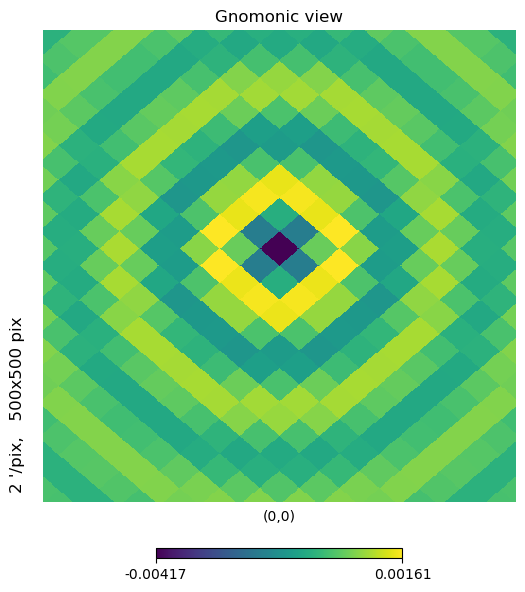

In [24]:

hp.gnomview(output_map[0].value-input_map[0], reso=2, xsize=500)

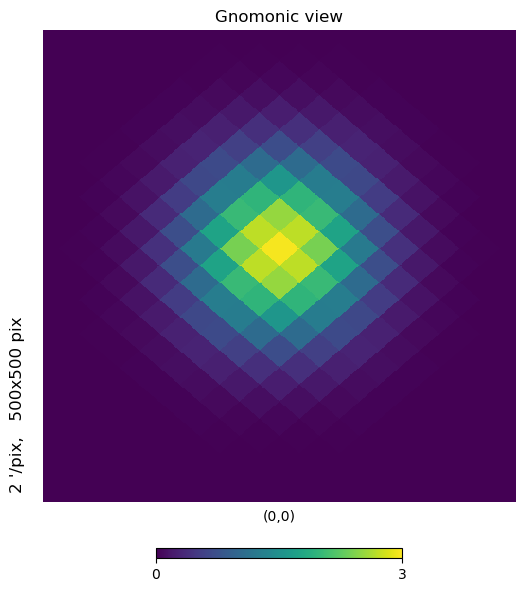

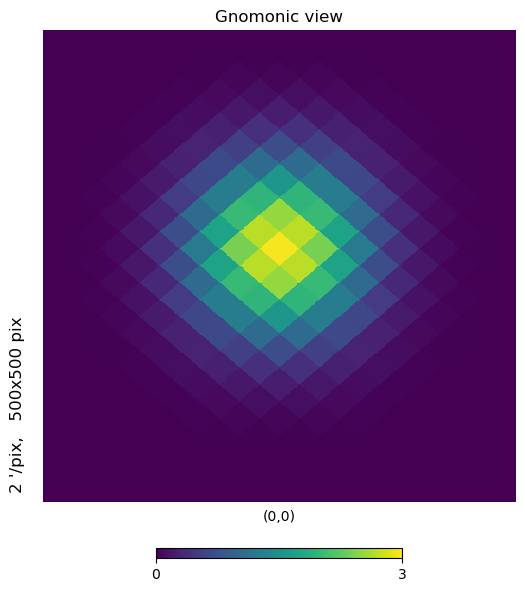

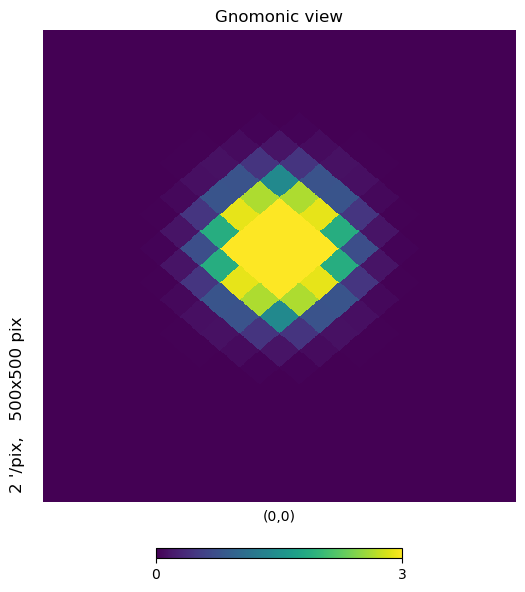

In [15]:
hp.gnomview(input_map[0], reso=2, xsize=500, min=0, max=3)
hp.gnomview(output_map[0], reso=2, xsize=500, min=0, max=3)
hp.gnomview(m_smoothed[0], reso=2, xsize=500, min=0, max=3)

In [16]:
c.pre_applied_beam

{64: 3}

In [17]:
hp.gauss_beam(np.radians(3), lmax=1.5 * nside, pol=True).shape

(97, 4)